### 利用开源制图库cartopy进行gis数据可视化


In [95]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from osgeo import gdal 
from cartopy.io.shapereader import Reader
import numpy as np
from osgeo import ogr
import matplotlib


In [96]:
path_kunming = 'data/Section_6/kunming_wgs84.shp'


In [97]:
proj = ccrs.PlateCarree()
kunming_geo = Reader(path_kunming).geometries()   ### 读入矢量
kunming_cfeat = cfeat.ShapelyFeature(kunming_geo, proj)


### 矢量数据显示


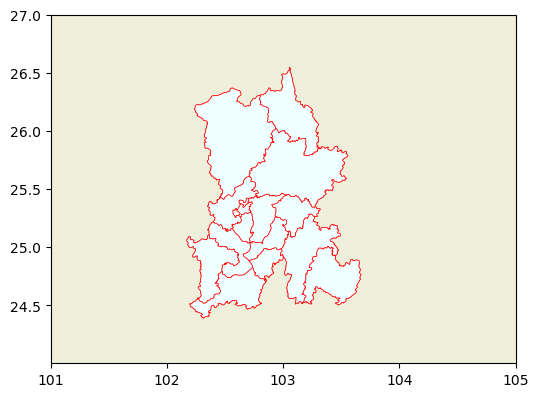

In [98]:
fig = plt.figure(figsize=(6,6))
x_extent = [101,102,103,104, 105]
y_extent = [24.5, 25, 25.5, 26, 26.5, 27]
ax_geo = fig.add_subplot(111, projection=proj)
ax_geo.set_extent([101, 105, 24, 27])
ax_geo.add_feature(cfeat.LAND)
ax_geo.add_feature(kunming_cfeat, facecolor='Azure', edgecolor = 'red', linewidth=0.5)
ax_geo.set_xticks(x_extent)
ax_geo.set_yticks(y_extent)

#### 栅格数据显示

In [116]:
path_rsimg = 'data/遥感影像/20200411T033531_20200411T033830_T47RRH_wgs84_ChengGong.tif'
ds_rsimg = gdal.Open(path_rsimg)
array_rsimg = ds_rsimg.ReadAsArray()
array_rsimg = array_rsimg.transpose(1,2,0)
array_rsimg_ = np.clip(array_rsimg, 0, 2000)/2000
array_rsimg_ = np.where(array_rsimg_==0, 1, array_rsimg_)
### 计算影像范围
ds_trans = ds_rsimg.GetGeoTransform()
lon_min, lat_max = ds_trans[0], ds_trans[3]
lon_max = lon_min + ds_trans[1] * ds_rsimg.RasterXSize
lat_min = lat_max + ds_trans[5] * ds_rsimg.RasterYSize
extent_rsimg = (lon_min, lon_max, lat_min, lat_max) 
extent_rsimg


(102.703814432, 102.999369759, 24.701069345, 24.993242602)

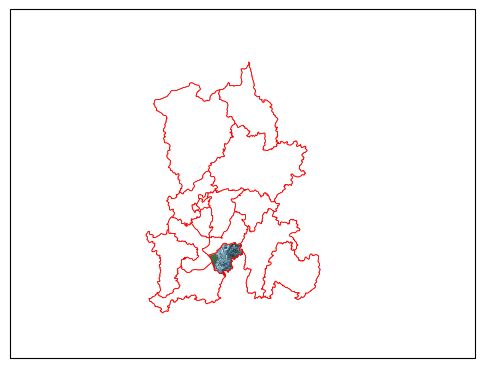

In [117]:
fig = plt.figure(figsize=(6,6))
x_extent = [101,102,103,104, 105]
y_extent = [24.5, 25, 25.5, 26, 26.5, 27]
ax_geo = fig.add_subplot(111, projection=proj)
ax_geo.set_extent([101, 105, 24, 27])
ax_geo.imshow(array_rsimg_[:,:,0:3], extent=extent_rsimg)
ax_geo.add_feature(kunming_cfeat, facecolor='none', edgecolor = 'red', linewidth=0.5)


### 课后练习
利用cartopy制图，展示呈贡区遥感影像，以及呈贡区在昆明市的位置（要求所作地图直观简洁、且信息充分）。
